# Generating images using Huggingface models
In this notebook we demonstrate how to use free models such as [Stable Diffusion 2](https://huggingface.co/stabilityai/stable-diffusion-2-1-base) from the [huggingface hub](https://huggingface.co/) to generate images. The example code shown here is modified from [this source](https://huggingface.co/docs/diffusers/api/models/autoencoder_tiny).

In [1]:
import torch
import numpy as np
import stackview
from diffusers import DiffusionPipeline, AutoencoderTiny

All models from the Huggingface hub work similarily. A `pipe` is set up which can be executed later. When executing this code for the first time, multiple files will be downloaded, which are locally stored in a foolder `.cache/huggingface/hub/<model_name>`. These folders can become multiple gigabytes large and this may take some time. When executing the code again, the cached models will be used and the process will be much faster. 

In [2]:
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base", torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

If a powerfull [CUDA](https://en.wikipedia.org/wiki/CUDA)-compatible graphics processing unit (GPU) is available, the executable `pipe` can be loaded on the GPU. In most cases, this is limited by available GPU memory. Only rare capabale models are executable on laptop GPUs.

In [3]:
pipe = pipe.to("cuda")

After the pipe has been set up, we can execute it like this:

  0%|          | 0/50 [00:00<?, ?it/s]

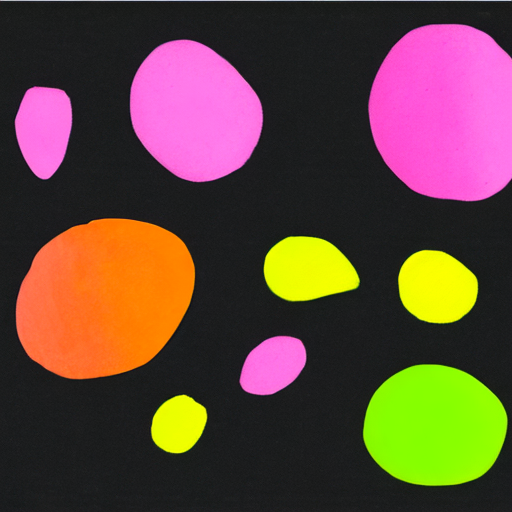

In [4]:
prompt = """
Draw a picture of bright blobs on dark background. Some of the blobs are roundish, some are a bit elongated.
"""

image = pipe(prompt).images[0]
image

Depending on the model / pipeline, we can specify additional parameters:

  0%|          | 0/10 [00:00<?, ?it/s]

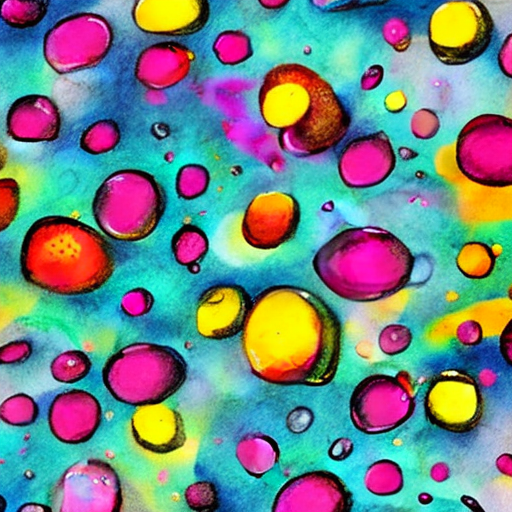

In [5]:
image = pipe(prompt, 
             num_inference_steps=10, 
             width=512, 
             height=512).images[0]
image

The image is a [pillow image](https://pillow.readthedocs.io/en/stable/reference/Image.html).

In [6]:
type(image)

PIL.Image.Image

It can be converted to numpy like this

StackViewNDArray([[[ 20,  11,  14],
                   [ 22,   9,   9],
                   [ 17,  11,  19],
                   ...,
                   [184, 187, 180],
                   [187, 191, 185],
                   [184, 184, 181]],

                  [[  0,   0,   4],
                   [ 16,  10,  12],
                   [ 12,   9,  18],
                   ...,
                   [178, 182, 180],
                   [180, 183, 184],
                   [180, 182, 182]],

                  [[  0,   0,   6],
                   [ 18,   9,  17],
                   [ 21,   5,  25],
                   ...,
                   [179, 182, 181],
                   [183, 184, 184],
                   [183, 182, 184]],

                  ...,

                  [[ 16,  12,  28],
                   [ 12,  10,  29],
                   [  5,   3,  27],
                   ...,
                   [227, 214, 231],
                   [226, 211, 227],
                   [224, 208, 224]],

                  [[ 12,   7,  25],
                   [ 10,  12,  27],
                   [  2,   8,  30],
                   ...,
                   [223, 211, 229],
                   [228, 213, 231],
                   [228, 214, 231]],

                  [[  6,   4,  25],
                   [  0,   0,  22],
                   [  0,   0,  32],
                   ...,
                   [219, 205, 222],
                   [225, 211, 226],
                   [225, 213, 226]]], dtype=uint8)
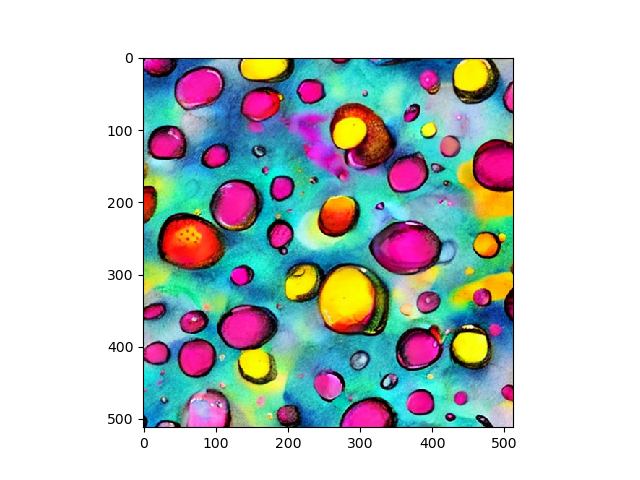
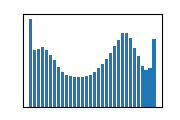

In [7]:
image_np = np.array(image)

stackview.insight(image_np)

# Exercise
Use the `pipe()` function and prompt for another image, e.g. showing a cat sitting in front of a computer.